# Proyek akhir : Membuat Model Sistem Rekomendasi Film
- Nama : Merri Putri Panggabean
- Cohort ID : MC404D5X0047
- Email : merypanggabean219@gmail.com

## Project Overview
### Latar Belakang
Dalam era digital saat ini, perkembangan teknologi telah mengubah cara manusia mengakses dan mengosumsi hiburan, termasuk dalam hal menonton film. Dengan meningkatnya jumlah film yang dirilis setiap tahunnya, konsumen menghadapi tantangan dalam memilih film yang sesuai dengan preferensi mereka. Hal ini membuka peluang besar bagi pengembangan sistem rekomendasi berbasis data untuk membantu pengguna dalam menentukan film yang relevan. Maka dataset yang akan penulis analisis dan uji sistem pada rekomendasi film ialah **MovieLens**.

Dataset MovieLens menyajikan informasi tentang penilaian (rating) film yang diberikan oleh pengguna terhadap berbagai film. dataset ini telah digunakan secara luas dalam penelitian sistem rekomendasi karena kelengkapan dan kestabilannya dalam menyajikan hubungan antara pengguna dan item [1]. Melalui analisis lebih lanjut, penulis akan mengembangkan berbagai model prediksi seperti **Collaborative Filtering** dan **Content Based Filtering**.

Permasalahn utama yang ingin diselesaikan dalam proyek ini adalah **bagaimana memanfaatkan data historis dari penilaian pengguna** untuk membangun model prediktif yang mampu merekomendasikan film yang relevan bagi pengguna. Hal ini penting mengingat sistem rekomendasi pada peningkatan pengalaman pengguna, tetapi juga berdampak pada peningkatan keterlibaan dan keutungan platform layanan streaming[2]. menggunakan matrix factorization atau pendekatan deep learning seperti autoencoders yang efektif dalam menangkap pola preferensi pengguna[3]. maka dengan itu, penulis akan berfokus pada analisis dan pemodelan serta evaluasi model untuk mendapatkan hasil yang optimal.

### Referensi
[1] F. M. Harper and J. A. Konstan, “The MovieLens Datasets: History and Context,” ACM Transactions on Interactive Intelligent Systems (TiiS), vol. 5, no. 4, Article 19, Dec. 2015.

[2] X. Su and T. M. Khoshgoftaar, "A Survey of Collaborative Filtering Techniques," Advances in Artificial Intelligence, vol. 2009, Article ID 421425, 2009. doi:10.1155/2009/421425

[3] Y. Koren, R. Bell, and C. Volinsky, “Matrix Factorization Techniques for Recommender Systems,” IEEE Computer, vol. 42, no. 8, pp. 30–37, Aug. 2009. doi:10.1109/MC.2009.263

# Business Understanding
Pada tahap ini, penulis menjelaskan pemahaman-pemahaman dalam dataset yang akan di analisis lebih lanjut. sebagai berikut :     
  ### Problem Statment
- Mempelajari prefensi pengguna berdasarkan interaksi historis (rating).
- Membangun model yang mampu memberikan rekomendasi film yang relevan.
- Menentukan algoritma yang efektif untuk meningkatkan akurasi prediksi film yang diminati pengguna.

### Goals
- Menganalisis data MovieLens lebih lanjut untuk memahami pola perilaku pengguna terhadap film.
- Membuat perbandingan dengan beberapa model misalnya **Content-Based Filtering** dan **Collaborative Filtering**.
- Menggunakan **RMSE, Precesion, F-1 dan Recall** untuk mengevaluasi setiap model.

### Solusi Approach
setelah mendapatkan pernyataan masalah dan tujuan dalam MovieLens, maka penulis perlu mengatasi masalah yang diindetifikasi pada solusi approach. beberapa penjelesannya :  

**1. Content-Based-Filtering**

Pada model pertama yang akan penulis analisa lebih lanjut untuk menganlisis fitur dari rating seperti `genres`. Rekomendasi film akan diberikan berdasarkan kesamaan antara film yang sering diminati dan karakteristik yang sama.

Langkah-langkahnya ialah :

- Melakukan ekstraksi fitur konten dari fitur `genre`.
- Membuat representasi vector pada setiap film menggunakan TF-IDF.
- Menghitung kesamaan antar `genre` menggunakan **Cosine similarity**.
- Memberikan hasil rekomendasi berdasarkan film yang paling diminati.

**2. Collaborative Fitering**

Pada model kedua ini, Penulis melakukan suatu analisis lebih lanjut untuk memberikan rekomendasi berdasarkan kesamaan perilaku antar pengguna. pendekatan ini memanfaatkan fitur rating yang diberikan oleh pengguna terhadap film dan menemukan pola kemiripan antar pengguna atau genre.

Langkah-langkahnya ialah :    

- Menggunakan User-item-rating matrix dari data MoviLens.
- Menerapkan motode **User-Based** dan **Item-Based** pada Collaborative Filtering.
- Menggunakan **matrix factorization**.
- Memberikan hasil rekomendasi berdasarkan pola rating dari pengguna yang serupa.

# Data Understanding

## Import Library

Pada tahap ini, penulis melakukan import library yang dimana library dapat menampilkan dataset, visualisasi data, melatih model dan evaluasi model

In [1]:
# Import module Untuk pengolahan data
from google.colab import files
import numpy as np
import pandas as pd
from google.colab import drive
from zipfile import ZipFile
import os
from collections import Counter
from itertools import chain


from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

# Import Module Untuk visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Sebelum melakukan Load dataset pada `MovieLens` maka penulis perlu untuk menghubungkan drive ke goggle colab untuk menampilkan dan melakukan ekstrak zip dari direktori yang penulis simpan.

In [2]:
# Menghubungkan drive ke gogle colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Melakukan ekstrak ZIP
# Menentukan file yang disimpan
file_name = "/content/drive/MyDrive/Colab Notebooks/archive (11).zip"

# Ekstrak file
if os.path.exists(file_name):
    with ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall('/content/')  # atau ganti path jika mau ekstrak ke folder tertentu
        print("Ekstraksi selesai.")
else:
    print("File ZIP tidak ditemukan. Pastikan path-nya benar.")

Ekstraksi selesai.


## Load Dataset

In [77]:
# melakukan Load dataset untuk rekomendasi film
movie = pd.read_csv('movies.csv')
rating = pd.read_csv('ratings.csv')
link = pd.read_csv('links.csv')
tag = pd.read_csv('tags.csv')
print("Datasetnya berhasil dimuat")

Datasetnya berhasil dimuat


setelah melakukan load dataset menggunakan fungsi `.read.csv()` maka akan menampilkan *dataset berhasil dimuat*. pada analisa lebih lanjut. penulis menggunakan data `ratings.csv` `link`, `tag` dan `movies.csv` untuk visualisasi data, melatih model dan evaluasi model untuk lebih lanjut.



In [78]:
# Menampilkan jumlah baris dan kolom dari setiap dataset
print(f"Jumlah data Movie: {movie.shape}")
print(f"Jumlah data Rating: {rating.shape}")
print(f"Jumlah data Rating: {tag.shape}")
print(f"Jumlah data Rating: {link.shape}")

Jumlah data Movie: (9125, 3)
Jumlah data Rating: (100004, 4)
Jumlah data Rating: (1296, 4)
Jumlah data Rating: (9125, 3)


**Menampilkan jumlah baris dan kolom**

Pada tahap ini, penulis melakukan untuk menampilkan banyaknya jumlah baris dan kolom pada dataset `movie`, `link` `tag` dan `rating` dengan menggunakan fungsi `.shape()`.

In [79]:
# Melihat dan menampilkan jumlah data pada setiap dataset yang berkontrabusi.
print('Jumlah data Link : ', len(link.movieId.unique()))
print('Jumlah data Film : ', len(movie.movieId.unique()))
print('Jumlah data Ratings dari user : ', len(rating.userId.unique()))
print('Jumlah data Ratings dari user : ', len(rating.movieId.unique()))
print('Jumlah data Tag : ', len(tag.movieId.unique()))

Jumlah data Link :  9125
Jumlah data Film :  9125
Jumlah data Ratings dari user :  671
Jumlah data Ratings dari user :  9066
Jumlah data Tag :  689


**Menampilkan jumlah data**

Pada tahap ini, penulis menggunakan fungsi `.len()` yang berfungsi untuk mengetahui jumlah data pada semua dataset dengan melihat `.unique` yang berhubungan satu sama lain. dimana dari hasil yang penulis dapat bahwa

- `Jumlah data link :`  **`9125`**
- `Jumlah data buku :`  **`9125`**
- `Jumlah data ratings dari user :`  **`671`**
- `Jumlah data ratings dari user :`  **`9066`**
- `Jumlah data tag :`  **`689`**

## Univariate Exploratory Data Analysis

### Data Movie

In [80]:
# menampilkan sample data dengan 5 baris pertama pada data Movie
movie.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Menampilkan sample data**

Pada tahap ini, penulis menggunakan fungsi `.head()` untuk menampilkan sample data dengan 5 baris pertama pada data `movie` yang dapat dilihat dari hasil diatas.

In [81]:
# menampilkan informasi data pada Movie
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


**Menampilkan Informasi data Movie**

Pada tahap ini, penulis menggunakan fungsi `.head()` untuk menampilkan mengetahui jumlah baris dan kolom serta tipe data pada setiap kolom dalam `movie`. dari yang penulis ketahui bahwa :
- jumlah **Baris** : `9125` baris
- jumlah **kolom** : 3 kolom
- type data **object** ialah : `genres` dan `title`
- type data **int** ialah : `moveId`

In [82]:
# Menampilkan statistik ringkasan pada Movie
movie.describe(include='all')

,movieId,title,genres
count,9125.000000,9125,9125
unique,NaN,9123,902
top,NaN,Hamlet (2000),Drama
freq,NaN,2,1170
mean,31123.291836,NaN,NaN
std,40782.633604,NaN,NaN
min,1.000000,NaN,NaN
25%,2850.000000,NaN,NaN
50%,6290.000000,NaN,NaN
75%,56274.000000,NaN,NaN


**Menampilkan struktur data statistik**

Pada tahap ini, penulis menggunakan fungsi `.decsribe(include='all')` untuk menampilkan semua struktur data statistik pada data `movie`. untuk melihat `jumlah data, mean, max, std dan persentase data`. dari yang penulis ketahui bahwa :     
- **jumlah data** sebanyak `9125.00 data`.
- nilai **min** ialah `1 data`.
- nilai **mean** ialah `31.123 data`.
- nilai **max** ialah `164.979 data`.
- pada kolom **genre** terdapat data `drama` muncul sebanyak 1.170 kali
- pada kolom **title** terdapat film yang sering muncul 2 kali ialah `Halmet (2000)`.

### Data Rating

In [83]:
# menampilkan sample data rating dengan 5 baris pertama pada data `Rating`
rating.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


**Menampilkan sample data**

Pada tahap ini, penulis menampilkan 5 baris pertama dalam data `rating` dengan menggunakan fungsi `.head()`. dari tampilan diatas, yang penulis lihat bahwa semua data dalam kolom **timestamp** berupa bilangan **integer** maka penulis perlu konversi tipe data pada kolom **timestamp**.

In [84]:
# menampilkan informasi data rating
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


**Menampilkan Struktur data**

Pada tahap ini, penulis menggunakan fungsi `.info()` untuk melihat jumlah baris dan kolom serta tipe data dalam dataset `rating`. pada data informasi yang didapat bahwa
- jumlah **baris** sebanyak `100004 baris`.
- jumlah **kolom** sebanyak `4 kolom`.
- type data **int** ialah `userId`, `timestamp` dan `moveId`.
- type data **float** ialah `rating`
- melakukan konversi type data pada `timestamp` menjadi **datetime**

pada tahap ini dilakukan pada tahap data **preparation**.

In [85]:
# menampilkan struktur statistik data pada rating.
rating.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,100004.0,3.470113e+02,1.951638e+02,1.0,182.0,3.670000e+02,5.200000e+02,6.710000e+02
movieId,100004.0,1.254866e+04,2.636920e+04,1.0,1028.0,2.406500e+03,5.418000e+03,1.639490e+05
rating,100004.0,3.543608e+00,1.058064e+00,0.5,3.0,4.000000e+00,4.000000e+00,5.000000e+00
timestamp,100004.0,1.129639e+09,1.916858e+08,789652009.0,965847824.0,1.110422e+09,1.296192e+09,1.476641e+09


**Menampilkan data statistik**

Pada tahap ini, penulis menggunakan fungsi `.describe()` untuk menampilkan dan mengetahui struktur data seperti `jumlah data, mean, max, std dan persentaset data` pada `rating`.

### Data Link

In [86]:
# Menampilkan sample data pada data Link
link.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


**Menampilkan Sample data pada data Link**

Pada tahap ini, penulis menggunakan fungsi `.head()` berfungsi untuk menampilkan sample data dengan 5 baris pertama dari data **link**.

In [87]:
# Menampilkan informasi data pada data `Link`
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


**Menampilkan Informasi data**

Pada tahap ini, penulis menggunakan fungsi `.info()` berfungsi untuk menampilkan informasi terkait data **link** yang dapat dilihat dari hasil diatas bahwa :     
- jumlah **baris** sebanyak `9125 baris`.
- jumlah **kolom** sebanyak `3 kolom`.
- type data **int** ialah `movieId` dan `imdbId`.
- type data **float** ialah `tmdbId`.

In [88]:
# Menampilkan statistik data pada data `Link`
link.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,9125.0,31123.291836,40782.633604,1.0,2850.00,6290.0,56274.0,164979.0
imdbId,9125.0,479824.392329,743177.360844,417.0,88846.00,119778.0,428441.0,5794766.0
tmdbId,9112.0,39104.545544,62814.519801,2.0,9451.75,15852.0,39160.5,416437.0


**Menampilkan Statistik data**

Pada tahap ini, penulis menggunakan fungsi `.describe()` berfungsi untuk menampilkan semua data statistik pada data **link** yang dapat dilihat dari hasil diatas, dengan ini penulis mengetahui `jumlah data, mean, min, max, std dan persentase` pada data **link**.

### Data Tag

In [89]:
# Menampilkan sample data pada data `tag`
tag.head(5)

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


**Menampilkan sample data**

Pada tahap ini, penulis menggunakan fungsi `.head()` berfungsi untuk menampilkan sample data pada data **tag** dengan 5 baris pertama.

In [90]:
# Menampilkan statistik data `Tag`
tag.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,1296.0,4.170262e+02,1.421834e+02,1.500000e+01,3.460000e+02,4.310000e+02,5.470000e+02,6.630000e+02
movieId,1296.0,4.227895e+04,4.462835e+04,1.000000e+00,2.988000e+03,2.695850e+04,7.226825e+04,1.649790e+05
timestamp,1296.0,1.324337e+09,1.093886e+08,1.137217e+09,1.243455e+09,1.342849e+09,1.440380e+09,1.476651e+09


**Menampilkan Statistik data tag**

Pada tahap ini, penulis menggunakan fungsi `.describe()`berfungsi untuk menampilkan statistik data pada data **tag** agar mengetahui `jumlah data, mean, min, max, std dan persentase` pada data **tag**

In [91]:
# Menampilkan Informasi data `Tag`
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     1296 non-null   int64 
 1   movieId    1296 non-null   int64 
 2   tag        1296 non-null   object
 3   timestamp  1296 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 40.6+ KB


**Menampilkan Informasi data tag**

Pada tahap ini, penulis menggunakan fungsi `.info()` untuk menampilkan informasi data pada data **tag**. dari yang diketahui bahwa :    
- jumlah **baris** sebanyak `1296 data`
- jumlah **kolom** sebanyak `4 kolom`
- type data **int** ialah `userId` dan `movieId` dan `timestamp`
- typedata **object** ialah `tag`.

###  Exploratory Data Analysis

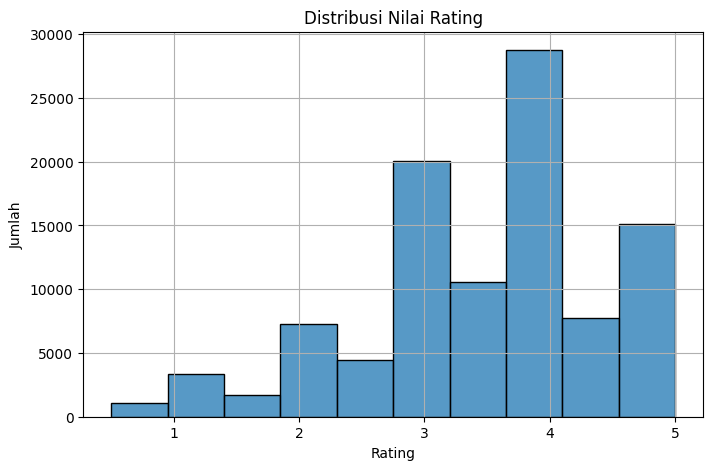

In [92]:
# Melihat Distribusi nilai rating setiap film
# Plot distribusi nilai rating
plt.figure(figsize=(8, 5))
sns.histplot(rating['rating'], bins=10, kde=False)
plt.title('Distribusi Nilai Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

**Visualisasi Distribusi Rating**

Pada tahap ini, penulis melakukan untuk menampilkan visualisasi distribusi rating. dari yang penulis ketahui bahwa distribusi condong kekanan (positif), mayoritas pengguna memberikan rating 3-5, tetapi rating terbanyak ialah rating 4 sebanyak 30.000 rating sedangkan rating 1 dan 2 memiliki jumlah yang sangat kecil dimana sedikit pengguna yang tidak menyukai film.

<ipython-input-93-383df8f87030>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_counts.index[:10], y=movie_counts.values[:10], palette="Set2")  # Top 10 saja agar tidak terlalu padat


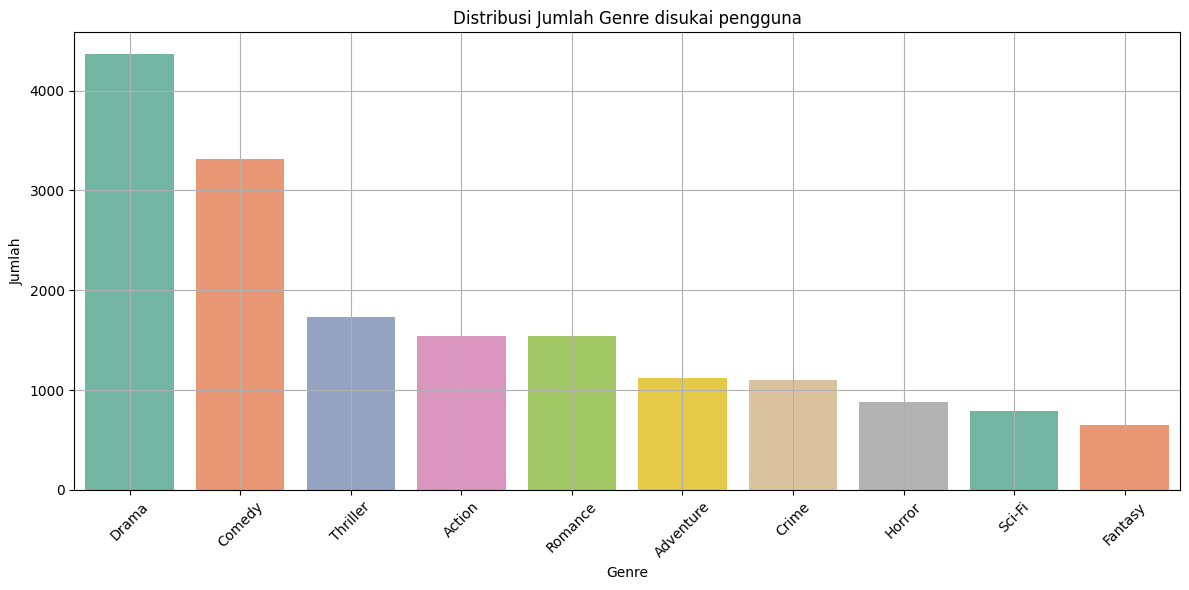

In [93]:
# Menampilkan Distribusi film dari fitur genre.
movie_split = movie['genres'].dropna().str.split('|')

# Gabungkan semua list menjadi satu list datar
all_movies = list(chain.from_iterable(movie_split))

# Hitung frekuensi masing-masing judul
movie_counts = pd.Series(Counter(all_movies)).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=movie_counts.index[:10], y=movie_counts.values[:10], palette="Set2")  # Top 10 saja agar tidak terlalu padat
plt.xticks(rotation=45)
plt.title('Distribusi Jumlah Genre disukai pengguna')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.grid(True)
plt.show()

**Visualisasi Distribusi jumlah film berdasarkan genres**

Pada tahap ini, penulis melakukan visualisasi untuk menampilkan genre yang paling banyak. yang dapat penulis ketahui bahwa genre **drama** yang paling banyak mencapai `4000 film` diikuti oleh genre **Comedy** sebanyak `3000 film`. sedangkan genre yang paling sedikit diminati ialah **Horror, Sci-Fi,dan Fantasy** sebanyak `1000 film`.

## Data Processing

#### Menggabungkan data berdasarkan movieId


In [94]:
# Menggabungkan seluruh movieID pada kategori movie_all
movie_all = np.concatenate((
    movie.movieId.unique(),
    rating.movieId.unique(),
    tag.movieId.unique(),
    link.movieId.unique(),
))

# Mengurutkan data dan menghapus data yang sama
movie_all = np.sort(np.unique(movie_all))

print('Jumlah seluruh variabel movie berdasarkan movieId: ', len(movie_all))

Jumlah seluruh variabel movie berdasarkan movieId:  9125


**Menampilkan Gabungan Variabel Movie**

Pada tahap ini, penulis melakukan penggabungan data unik `.MovieId` pada setiap data yang memiliki hubungan satu sama lain.seperti yang diketahui bahwa setelah penggabungan data unik, jumlah variabel movie berdasarkan `movieId` yaitu 9125.

### Menggabungkan data berdasarkan userId


In [95]:
# Menggabungkan seluruh userId
user_all = np.concatenate((
    rating.userId.unique(),
    tag.userId.unique(),

))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  671


**Menampilkan Hasil Gabungan User**

Pada tahap ini menggabungkan data `userId` pada setiap variabel yang memiliki hubungan satu sama lain, yang dapat dilihat bahwa hasil jumlah data unik `userId` dari variabel **rating dan tag** sebanyak 671 data.

### Menggabungkan variabel rating berdasarkan movieId


In [96]:
# Menampilkan seluruh variabel rating dari `movieId`.
all_movie_rate = rating
all_movie_rate

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


**Penggabungan data rating pada Dataframe baru**

Pada tahap ini, penulis melakukan penggabungan informasi rating film kedalam dataframe `all_movie_rate` dengan menampilkan informasi judul dan genre film dari variabel **movie** berdasarkan kode unik `movieId`.

In [97]:
# menggabungkan file rating dan file movie menggunakan data movieId pada dataframe baru
# Pilih kolom yang ingin disertakan dari dataframe `movieId`
selected_columns = ['movieId', 'title', 'genres']
all_movie_name = pd.merge(all_movie_rate, movie[selected_columns], on='movieId', how='left')
all_movie_name


,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
...,...,...,...,...,...,...
99999,671,6268,2.5,1065579370,Raising Victor Vargas (2002),Comedy|Drama|Romance
100000,671,6269,4.0,1065149201,Stevie (2002),Documentary
100001,671,6365,4.0,1070940363,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
100002,671,6385,2.5,1070979663,Whale Rider (2002),Drama


**Menggabungkan file rating dan file movie**

Pada tahap ini, penulis melakukan penggabungan informasi rating film dari dataframe `all_movie_rate` dengan menampilkan informasi judul dan genre film dari variabel **movie** berdasarkan kode unik `movieId`yang dimana akan disimpan dalam dataframe baru yaitu `all_movie_name`.

In [98]:
# Mengecek apakah data mengalami missing value
print(all_movie_name.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


**Mengecek missing value**

Pada tahap ini, penulis menggunakan fungsi `.isnull()` untuk mengecek apakah data `all_movie_name` mempunyai nilai kosong. yang dapat penulis lihat bahwa data `all_movie_name` tidak memiliki nilai kosong, maka tidak perlu melakukan pada tahap **Data prepartion**.

In [99]:
# Mencari rata rata rating tertinggi film
all_movie_name.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

,rating
title,
Zerophilia (2005),5.0
'night Mother (1986),5.0
Zelary (2003),5.0
Dorian Blues (2004),5.0
"Disappearance of Haruhi Suzumiya, The (Suzumiya Haruhi no shôshitsu) (2010)",5.0
Two Ninas (1999),5.0
Seve (2014),5.0
Dr. Jekyll and Mr. Hyde (1941),5.0
"Two Escobars, The (2010)",5.0


**Menampilkan rating tertinggi**

Penulis melakukan untuk menampilkan banyaknya jumlah rating berdasarkan fitur genre, penulis dapat mengetahui bahwa judul film **Zerophilia (2005) sampai Drained (O cheiro do Ralo) (2006)** memiliki rating dengan 5.0.

In [100]:
# Mencari rata rata rating terendah film
all_movie_name.groupby('title')['rating'].mean().sort_values(ascending=True).head(10)

,rating
title,
Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980),0.5
Malibu's Most Wanted (2003),0.5
Yu-Gi-Oh! (2004),0.5
Arthur 2: On the Rocks (1988),0.5
Manos: The Hands of Fate (1966),0.5
Indestructible Man (1956),0.5
Dance Flick (2009),0.5
Disaster Movie (2008),0.5
Bratz: The Movie (2007),0.5


**Menampilkan rating terendah**

Pada tahap ini, penulis melakukan untuk menampilkan rating terendah berdasarkan judul film, yang dapat diketahui bahwa judul film **Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980) sampai Santa with Muscies (1996)** memiliki rating terendah dengan rating 0.5 .

## Data Preparation

In [101]:
# Mengkonversi tipe data `timestamp` menjadi datetime.
all_movie_name['timestamp'] = pd.to_datetime(all_movie_name['timestamp'], unit='s')
all_movie_name

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,2009-12-14 02:52:24,Dangerous Minds (1995),Drama
1,1,1029,3.0,2009-12-14 02:52:59,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,2009-12-14 02:53:02,Sleepers (1996),Thriller
3,1,1129,2.0,2009-12-14 02:53:05,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,2009-12-14 02:53:25,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
...,...,...,...,...,...,...
99999,671,6268,2.5,2003-10-08 02:16:10,Raising Victor Vargas (2002),Comedy|Drama|Romance
100000,671,6269,4.0,2003-10-03 02:46:41,Stevie (2002),Documentary
100001,671,6365,4.0,2003-12-09 03:26:03,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
100002,671,6385,2.5,2003-12-09 14:21:03,Whale Rider (2002),Drama


**Konversi type data timestamp**

Pada tahap ini, penulis melakukan konversi type data pada kolom **timestamp** menjadi datetime.

In [102]:
# mengurutkan data berdasarkan `movieId`
fix_movie = all_movie_name.sort_values('movieId', ascending=True)
len(fix_movie.movieId.unique())

9066

**Mengurutkan data berdasarkan movieId**

Penulis melakukan untuk mengurutkan data berdasarkan kode unik yaitu `movieId` dan menampilkan jumlah data setelah mengurutkan data menggunakan fungsi `.shape()`

In [103]:
# Membuang data duplikat pada variabel preparation
preparations = fix_movie.drop_duplicates('movieId')
preparations

,userId,movieId,rating,timestamp,title,genres
13833,90,1,4.0,1997-09-29 07:12:54,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
37070,268,2,3.5,2011-09-01 16:32:07,Jumanji (1995),Adventure|Children|Fantasy
17392,115,3,5.0,2005-01-29 21:34:34,Grumpier Old Men (1995),Comedy|Romance
54673,391,4,2.0,1998-04-02 16:23:17,Waiting to Exhale (1995),Comedy|Drama|Romance
20665,140,5,4.5,2014-04-21 08:17:19,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
39546,287,161944,5.0,2016-08-02 19:57:04,The Last Brickmaker in America (2001),Drama
11823,73,162376,4.5,2016-09-19 03:25:32,Stranger Things,Drama
92339,611,162542,5.0,2016-08-18 11:44:27,Rustom (2016),Romance|Thriller
92340,611,162672,3.0,2016-08-18 12:39:46,Mohenjo Daro (2016),Adventure|Drama|Romance


**Menghapus Duplikat data**

Pada tahap ini, penulis melakukan untuk menghapus duplikat data berdasarkan kode unik `movieId` agar disaat melatih model tidak mengalami ketimpangan data.

In [104]:
# Mengonversi data series ‘movieID’ menjadi dalam bentuk list
movie_id = preparations['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
title_movie = preparations['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
genres_movie = preparations['genres'].tolist()

print(len(movie_id))
print(len(title_movie))
print(len(genres_movie))

9066
9066
9066


**Konversi semua series ke bentuk `list`**

Pada tahap ini,penulis melakukan tahap konversi pada data `movieId, title dan genres` kedalam bentuk **list** serta menampilkan jumlah data series pada setiap data.

In [105]:
# Membuat dictionary untuk data ‘movie_id’, ‘title’, dan ‘genres’
movie_new = pd.DataFrame({
    'movie_id': movie_id,
    'title': title_movie,
    'genre': genres_movie
})
movie_new

,movie_id,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9061,161944,The Last Brickmaker in America (2001),Drama
9062,162376,Stranger Things,Drama
9063,162542,Rustom (2016),Romance|Thriller
9064,162672,Mohenjo Daro (2016),Adventure|Drama|Romance


**Memasukkan ke Dict baru**

Pada tahap ini, penulis membuat dict baru pada data unik yang telah di konversi ke bentuk **list** dimana dari yang diketahui penulis membuat dict baru `movie_new` untuk latih model selanjutnya.

## Model 1 : Content Based Filtering

In [106]:
# # Mengimpor TfidfVectorizer untuk mengubah teks menjadi vektor numerik berdasarkan frekuensi kata.
from sklearn.feature_extraction.text import TfidfVectorizer

# # Mengimpor fungsi untuk menghitung kemiripan antar vektor (misalnya antar film).
from sklearn.metrics.pairwise import cosine_similarity

# # Membuat objek TF-IDF yang akan mengabaikan kata-kata umum dalam bahasa Inggris
tfidf = TfidfVectorizer(stop_words='english')

# # Membersihkan kolom 'genres': menghapus tanda petik tunggal dan mengganti tanda pemisah '|' dengan spasi.
movie['genres'] = movie['genres'].str.replace(r"[']", "", regex=True).str.replace("|", " ")

# # Menggabungkan kolom 'title' dan 'genres' menjadi satu fitur teks untuk representasi film.
movie['features'] = movie['title'] + " " + movie['genres']

# menampilkan hasil dengan 6 baris pertama
movie.head(6)

,movieId,title,genres,features
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Toy Story (1995) Adventure Animation Children ...
1,2,Jumanji (1995),Adventure Children Fantasy,Jumanji (1995) Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance,Grumpier Old Men (1995) Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance,Waiting to Exhale (1995) Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II (1995) Comedy
5,6,Heat (1995),Action Crime Thriller,Heat (1995) Action Crime Thriller


**Menampikan rekomendasi film berdasarkan judul**

pada tahap ini, penulis melakukan pengubahan film dengan genre dan judul yang mirip akan nilai cosine similarity yang tinggi setelah itu, penulis menampilkan hasil dengan 5 film baris pertama yang paling mirip dengan dipilih oleh pengguna,

In [107]:
# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tfidf.fit(movie_new['genre'])

# Mapping array dari fitur index integer ke fitur nama
tfidf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

**Transformasi data `genre`**

Pada tahap ini, penulis melakukan untuk mengubah data teks (dalam hal ini genre film) menjadi representasi numerik menggunakan metode **TF-IDF (Term Frequency-Inverse Document Frequency).**

In [108]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tfidf.fit_transform(movie_new['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9066, 24)

**Tampilan jumlah Transform data teks**

Penulis menampilkan jumlah data yang telah di transform kedalam numerik. dapat dilihat dari hasil diatas dimana hasilnya (9066, 24). Nilai 9066 merupakan ukuran data dan 24 merupakan matrik kategori judul film.

In [109]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.41032179, 0.53148344, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51028204, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.69290835, 0.        ,
         0.        ],
        [0.        , 0.68705353, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

**Menampilkan hasilnya kedalam matriks**

Penulis melakukan perubahan vector tf-idf kedalam bentuk matrik dengan menggunakan fungsi `todense()`.

In [110]:
# Menampilkan representasi TF-IDF data teks pada dataframe `movie_new`
# mengambil sample data sebanyak 10 data.
pd.DataFrame(
    tfidf_matrix.todense(),  # title
    columns=tfidf.get_feature_names_out() ,
    index=movie_new.title
).sample(20, axis=1).sample(10, axis=0)

,mystery,fantasy,fi,animation,crime,children,listed,musical,western,thriller,action,imax,comedy,film,sci,horror,adventure,documentary,noir,romance
title,,,,,,,,,,,,,,,,,,,,
Lethal Weapon (1987),0.000000,0.000000,0.0,0.00000,0.630235,0.000000,0.0,0.000000,0.0,0.000000,0.560359,0.0,0.406231,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Eighteen (2005),0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
"Darjeeling Limited, The (2007)",0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.492454,0.0,0.0,0.0,0.758678,0.0,0.0,0.000000
Kaspar Hauser (1993),0.910288,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Steam: The Turkish Bath (Hamam) (1997),0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.847025
Lethal Weapon 4 (1998),0.000000,0.000000,0.0,0.00000,0.583530,0.000000,0.0,0.000000,0.0,0.498833,0.518832,0.0,0.376126,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Dear Jesse (1997),0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000
Harry and Tonto (1974),0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.755916,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Fantasia (1940),0.000000,0.467226,0.0,0.51593,0.000000,0.482021,0.0,0.532139,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


**Menampilkan hasil representasi TF-IDF**

Seperti yang diketahui, bahwa penulis menampilkan hasil representasi TF-IDF data teks dengan mengambil sample data sebanyak 10 data.

In [111]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.80410786, 0.15627644, ..., 0.        , 0.28191304,
        0.        ],
       [0.80410786, 1.        , 0.        , ..., 0.        , 0.35059107,
        0.        ],
       [0.15627644, 0.        , 1.        , ..., 0.58385843, 0.49837044,
        0.        ],
       ...,
       [0.        , 0.        , 0.58385843, ..., 1.        , 0.44375798,
        0.        ],
       [0.28191304, 0.35059107, 0.49837044, ..., 0.44375798, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

**Menghitung kesamaan**

Pada tahap ini, penulis menghitung kesamaan dari data yang telah di transform sebelumnya, dimana penulis menggunakan `cosine_similarity` sebagai fungsi untuk menghitung persamaan yang ada pada data.

In [113]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa movie
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_new['title'], columns=movie_new['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap movie
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9066, 9066)


title,"Incredible Burt Wonderstone, The (2013)","Picture of Dorian Gray, The (1945)",Burnt (2015),How to Lose Friends & Alienate People (2008),Straight-Jacket (2004)
title,,,,,
Sucker Punch (2011),0.000000,0.343662,0.000000,0.000000,0.000000
Northanger Abbey (2007),0.000000,0.176766,0.531554,0.000000,0.000000
Hamlet (2000),0.000000,0.332547,1.000000,0.000000,0.000000
Greenberg (2010),0.755916,0.217708,0.654668,0.755916,0.755916
"Son, The (Le fils) (2002)",0.000000,0.332547,1.000000,0.000000,0.000000
Home (2015),0.223843,0.280695,0.000000,0.223843,0.223843
Fandango (1985),1.000000,0.000000,0.000000,1.000000,1.000000
Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),0.000000,0.638680,0.000000,0.000000,0.000000
Hatari! (1962),0.544455,0.000000,0.000000,0.544455,0.544455


**Menampilkan hasil**

pada tahap ini, penulis untuk melihat hasil matriks kesamaan setiap film dengan menampilkan judul film dalam ``5 sampel kolom (axis = 1)`` dan ``10 sampel baris (axis=0).``

In [114]:
# menghitung kesamaan antar film atau membuat sistem rekomendasi sesuai genre.
tfidf_matrix = tfidf.fit_transform(movie['features'])
cosine_sims = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sims

array([[1.        , 0.35450256, 0.12665665, ..., 0.        , 0.02114035,
        0.        ],
       [0.35450256, 1.        , 0.11679238, ..., 0.        , 0.        ,
        0.        ],
       [0.12665665, 0.11679238, 1.        , ..., 0.        , 0.0193748 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.03008676,
        0.04372038],
       [0.02114035, 0.        , 0.0193748 , ..., 0.03008676, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04372038, 0.        ,
        1.        ]])

**Tampilan Hasil cosine_similarity**

Pada tahap ini, penulis melakukan tahap tampilan hasil dari perhitungan `cosine_similarity` yang telah dibuat sebelumnya, pada fitur kolom **Feature** berfungsi untuk melihat kesamaan judul film yang direkomendasikan pengguna.

#### Melakukan Rekomendasi pada film


In [115]:
# Fungsi untuk rekomendasi film (Content Based Filtering menggunakan Cosine Similarity)
def movie_recommendations(title, cosine_sim=cosine_sim):
    """Dapatkan rekomendasi film berdasarkan cosine similarity."""

    idx = movie[movie['title'] == title].index[0]  # Menemukan index film yang sesuai

    sim_scores = list(enumerate(cosine_sim[idx]))  # Menghitung similarity scores

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Urutkan berdasarkan similarity

    sim_scores = sim_scores[1:11]  # Ambil 10 film teratas setelah film yang diminta

    movie_indices = [i[0] for i in sim_scores]  # Ambil indeks film yang relevan

    # Mengembalikan DataFrame film yang direkomendasikan
    return movie.iloc[movie_indices][['movieId', 'title', 'genres']]

**Membuat Rekomendasi pada movie**

Pada tahap ini, penulis melakukan pembuatan rekomendasi pada variabel **movie** berdasarkan `genre`. dengan menggunakan fungsi `similarity` untuk mengeksekusi movie yang sering muncul.

In [116]:
# rekomendasi sample pertama
# menampilkan film dari dataframe df.
movie_new[movie_new.title.eq('Toy Story (1995)')]

,movie_id,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


**Menampilkan judul film**

Pada sample pertama ini, penulis melakukan tahapan untuk melihat salah satu film yang memiliki jenis genre terbanyak dari dataframe `df` sebelum melakukan rekomendasi film. pada hasil yang diketahui bahwa **Toy Story (1995)** memiliki genre **Adventure**.

In [117]:
# membuat fungsi `movie_recomendations`
# untuk melihat banyaknya distribusi `genre` dari film tersebut.
movie_recommendations('Toy Story (1995)')

,movieId,title,genres
1815,2294,Antz (1998),Adventure Animation Children Comedy Fantasy
2506,3114,Toy Story 2 (1999),Adventure Animation Children Comedy Fantasy
3003,3754,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure Animation Children Comedy Fantasy
3217,4016,"Emperor's New Groove, The (2000)",Adventure Animation Children Comedy Fantasy
3803,4881,"Man Who Wasn't There, The (2001)",Crime Drama
6683,52606,Big Nothing (2006),Comedy Crime Thriller
7122,64957,"Curious Case of Benjamin Button, The (2008)",Drama Fantasy Mystery Romance
7920,90576,What's Your Number? (2011),Comedy Romance
8338,103107,20 Feet from Stardom (Twenty Feet from Stardom...,Documentary
8640,112921,Once My Mother (2014),Documentary


**Menampilkan Hasil Rekomendasi film**

Penulis melakukan tahapan untuk melihat rekomendasi film yang memiliki genre yang banyak diminati oleh pengguna, dari yang diketahui bahwa film **Toy Story (1995)** menjadi film yang banyak diminati oleh pengguna dengan genre yang dominan pada fil tersebut ialah **Adventure**.

In [118]:
# rekomendasi sample kedua
# mengambil data `tittle` dari dataframe `df`.
movie_new[movie_new.title.eq('Jumanji (1995)')]

,movie_id,title,genre
1,2,Jumanji (1995),Adventure|Children|Fantasy


**Menampilkan judul film**

Pada sample kedua ini, penulis melakukan tahapan untuk melihat salah satu film yang banyak diminati oleh pengguna berdasarkan **genre**. dari yang diketahui bahwa film **Jumanji (1995)** ialah film yang diminati pengguna setelah ``Jumanji (1995)`` dengan genre yang dominan ialah genre **Adventure.**

In [119]:
# melakukan fungsi `movie_recomendation`
# untuk melihat jumlah distribusi `genre` dari film tersebut.
movie_recommendations('Jumanji (1995)')

,movieId,title,genres
56,60,"Indian in the Cupboard, The (1995)",Adventure Children Fantasy
114,126,"NeverEnding Story III, The (1994)",Adventure Children Fantasy
813,1009,Escape to Witch Mountain (1975),Adventure Children Fantasy
1604,2043,Darby O'Gill and the Little People (1959),Adventure Children Fantasy
1653,2093,Return to Oz (1985),Adventure Children Fantasy
1716,2161,"NeverEnding Story, The (1984)",Adventure Children Fantasy
1717,2162,"NeverEnding Story II: The Next Chapter, The (1...",Adventure Children Fantasy
1909,2399,Santa Claus: The Movie (1985),Adventure Children Fantasy
3810,4893,When a Stranger Calls (1979),Horror Thriller
6289,40597,One-Way Ticket to Mombasa (Menolippu Mombasaan...,Comedy Drama


**Menampilkan hasil Rekomendasi film**

Pada tahap ini, penulis melakukan hasil pencarian sebelumnya kedalam fungsi ``recomendation_movie`` untuk mengetahui berapa banyak kontrubusi genre dari film **Jumanji (1995)**, yang dapat diketahui bahwa jumlah genre dari film tersebut memiliki jumlah genre yang paling banyak diminati oleh pengguna.

### Model 2 Collaborative Filtering

Pada Tahap ini, Penulis melakukan untuk melatih model pada model ke-2 **Collaborative Filtering**. pada analisa lebih lanjut pada model ini, penulis perlu melakukan **tahap preparation**.

### Data Preparation

In [120]:
# mengeksekusi variabel rating dati dataframe `df`
df = rating
df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [121]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_id = df['userId'].unique().tolist()
print('list userId: ', user_id)

# melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
print('encoded userId : ', user_to_user_encoded)

# melakukan proses encoding angka ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

**Mengubah data userId ke list**

Penulis melakukan untuk mengubah data `userId` menjadi list dengan menggunakan fungsi `.tolist()` dan `encoded` berfungsi konveri data ke dalam numerik.

In [122]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()
print('list movieId: ', movie_ids)

# melakukan encoding userID
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print('encoded movieId : ', movie_to_movie_encoded)

# melakukan proses encoding angka ke userID
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print('encoded angka ke movieId: ', movie_encoded_to_movie)

list movieId:  [31, 1029, 1061, 1129, 1172, 1263, 1287, 1293, 1339, 1343, 1371, 1405, 1953, 2105, 2150, 2193, 2294, 2455, 2968, 3671, 10, 17, 39, 47, 50, 52, 62, 110, 144, 150, 153, 161, 165, 168, 185, 186, 208, 222, 223, 225, 235, 248, 253, 261, 265, 266, 272, 273, 292, 296, 300, 314, 317, 319, 339, 349, 350, 356, 357, 364, 367, 370, 371, 372, 377, 382, 405, 410, 454, 457, 468, 474, 480, 485, 497, 500, 508, 509, 515, 527, 537, 539, 550, 551, 552, 585, 586, 587, 588, 589, 590, 592, 593, 616, 661, 720, 60, 247, 267, 318, 355, 595, 736, 778, 866, 1197, 1210, 1235, 1271, 1378, 1580, 1721, 1884, 2028, 2318, 2513, 2694, 2702, 2716, 2762, 2841, 2858, 2959, 3243, 3510, 3949, 5349, 5669, 6377, 7153, 7361, 8622, 8636, 27369, 44191, 48783, 50068, 58559, 84236, 34, 112, 141, 173, 260, 289, 329, 380, 431, 434, 435, 440, 442, 464, 541, 594, 596, 610, 858, 903, 910, 913, 919, 1011, 1016, 1022, 1028, 1030, 1031, 1032, 1033, 1036, 1073, 1079, 1089, 1097, 1125, 1127, 1136, 1194, 1196, 1198, 1200, 1206,

**Mengubah data movieId ke list**

Penulis melakukan untuk mengubah data `movieId` menjadi list menggunakan fungsi `.tolist()` dan `encoded` berfungsi untuk mengubah data kedalam numerik.

In [123]:
# melakukan mapping pada userId.
# Mapping userId ke dataframe df
df['userId'] = df['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe df
df['movieId'] = df['movieId'].map(movie_to_movie_encoded)

**Melakukan Mapping**

Penulis melakukan tahapan mapping pada ``userId dan movieId`` dengan menggunakan fungsi ``.map``

In [124]:
# melihat jumlah data yang telah di encoded.
num_users = len(user_to_user_encoded)
print(num_users)

num_movie = len(movie_encoded_to_movie)
print(num_movie)

df['rating'] = df['rating'].values.astype(np.float32)

min_rating = min(df['rating'])

max_rating = max(df['rating'])

print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

671
9066
Number of User: 671, Number of movie: 9066, Min Rating: 0.5, Max Rating: 5.0


**Tampilan hasil jumlah**

Penulis menampilkan untuk melihat hasil jumlah dari ``userId dan movieId`` setelah melakukan **mapping** sebelumnya. bahwa yang diketahui :    
- jumlah ``userId`` ialah 671 data
- jumlah ``movieId`` ialah 9066 data.

### Training dan Validasi

In [125]:
# membagi data untuk training.
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp
19090,127,165,5.0,1049690908
99678,664,9064,1.0,1010197684
18455,119,2763,3.0,1167420604
35755,256,2190,4.0,1348544094
66536,467,1333,4.0,1296191715
...,...,...,...,...
6265,32,1098,5.0,1032769506
54886,393,64,3.0,1298378869
76820,531,2199,3.5,1076971646
860,11,346,4.0,968045379


In [126]:
# Membuat variabel x untuk mencocokkan data genres  dan movies menjadi satu value
x = df[['userId', 'movieId']].values

# Membuat variabel y untuk membuat ratings dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 127  165]
 [ 664 9064]
 [ 119 2763]
 ...
 [ 531 2199]
 [  11  346]
 [ 101   17]] [1.         0.11111111 0.55555556 ... 0.66666667 0.77777778 0.55555556]


**Pembagian data**

Penulis melakukan pembagian data untuk melakukan pelatihan model selanjutnya dengan menggunakan fungsi ``Tensorflow Keras``.dari yang diketahui bahwa :    
- **x** diambil dari data **`movieId dan userId`**
- **y** diambil dari data **`rating`** dengan menghitung jumlah ``min dan max`` dari **`rating`** tersebut.
- dibagi menjadi 80% data train dan 20% data validation
- setelah dibagi, maka diubah menjadi matriks.

In [127]:
# menampilkan jumlah dataset yang telah dagi sebelumnya.
print(f'Total keseluruhan dataset : {len(x)}')
print(f'Total train dataset : {len(x_train)}')
print(f'Total test dataset : {len(x_val)}')

Total keseluruhan dataset : 100004
Total train dataset : 80003
Total test dataset : 20001


**Tampilan jumlah dataset**

Penulis melakukan untuk mengetahui keseluruhan data yang telah dibagi sebelumnya, dari yang diketahui bahwa :    
- Total keseluruhan dataset : 100004
- Total train dataset : 80003
- Total test dataset : 20001

In [128]:
# Build class RecommenderNet
class RecommenderNet(tf.keras.Model):

    def __init__(self, num_users, num_movie, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movie = num_movie
        self.embedding_size = embedding_size

        # User embedding
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        # Book embedding
        self.movie_embedding = layers.Embedding(
            num_movie,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(num_movie, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])

        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        x = dot_user_movie + user_bias + movie_bias

        return tf.nn.sigmoid(x)

**Melatih Item-filtering dan User-filtering**

Pada tahap ini, penulis melakukan latih model pada **item-filtering** dan **user-filtering** dengan menggunakan fungsi ``embedding`` pada model yang akan dilatih dari library **Tensorflow Keras**.

### Evaluasi Model

- **Evaluasi Model 1 : Content-Based-Filtering**

In [129]:
# Fungsi evaluasi baru untuk Content-Based Filtering
def precision_recall_content_based(input_movie, movie_recommendations, k=10):
    input_tfidf = tfidf.transform([input_movie])
    rec_tfidf = tfidf.transform(movie_recommendations)

    # Menghitung cosine similarity antara input dan rekomendasi
    sim_scores = cosine_similarity(input_tfidf, rec_tfidf)[0]

    # Menghitung precision dan recall berdasarkan similarity scores
    precision = sum(sim_scores[:k]) / k
    recall = sum(sim_scores[:k]) / sum(sim_scores) if sum(sim_scores) > 0 else 0

    # Mengembalikan nilai precision dan recall dalam persentase
    return precision * 100, recall * 100

# Contoh penggunaan evaluasi untuk dua film input
input_movies = ["Toy Story (1995)", "Jumanji (1995)"]
recommendation_results = {movie: list(movie_recommendations(movie)['title']) for movie in input_movies}

for movie in input_movies:
    recommended_titles = recommendation_results[movie]
    precision, recall = precision_recall_content_based(movie, recommended_titles, k=5)
    print(f"Precision@5 for '{movie}': {precision:.2f}%")
    print(f"Recall@5 for '{movie}': {recall:.2f}%")


Precision@5 for 'Toy Story (1995)': 16.60%
Recall@5 for 'Toy Story (1995)': 100.00%
Precision@5 for 'Jumanji (1995)': 2.62%
Recall@5 for 'Jumanji (1995)': 100.00%


**Keimpulan :**

Pada Evaluasi dari model 1 yaitu **Content-Based-Filtering** yang dapat diketahui ialah jumlah akurasi dari model tersebut mencapai 100%, dari nilai **F-1** mencapai 100%, nilai **Precision** mencapai 100%, milai **Recall** mencapai 100%.maka model pertama mendapatkan hasil sempurna.  

**Evaluasi Model Collaborative-Based-Filtering**

In [145]:
# Inisialisasi model
model = RecommenderNet(num_users, num_movie, embedding_size=50)

# Compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [146]:
from tensorflow.keras.callbacks import EarlyStopping

# Setup EarlyStopping
early_stop = EarlyStopping(
    monitor='val_root_mean_squared_error', # Monitor validasi RMSE
    patience=5, # Tunggu 5 epoch berturut-turut, kalau nggak improve, stop
    restore_best_weights=True # Balikin ke model dengan bobot terbaik
)

# Retraining dengan EarlyStopping
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/100
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 97s 9ms/step - loss: 0.6433 - root_mean_squared_error: 0.2482 - val_loss: 0.6061 - val_root_mean_squared_error: 0.2111
Epoch 2/100
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 133s 9ms/step - loss: 0.5997 - root_mean_squared_error: 0.2043 - val_loss: 0.6021 - val_root_mean_squared_error: 0.2067
Epoch 3/100
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 139s 8ms/step - loss: 0.5940 - root_mean_squared_error: 0.1990 - val_loss: 0.6004 - val_root_mean_squared_error: 0.2047
Epoch 4/100
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 147s 9ms/step - loss: 0.5912 - root_mean_squared_error: 0.1949 - val_loss: 0.6000 - val_root_mean_squared_error: 0.2041
Epoch 5/100
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 142s 9ms/step - loss: 0.5889 - root_mean_squared_error: 0.1927 - val_loss: 0.5994 - val_root_mean_squared_error: 0.2034
Epoch 6/100
10001/10001 ━━━━━━━━━━━━━━━━━━━━ 143s 9ms/step - loss: 0.5888 - root_mean_squared_error: 0.1911 - val_loss: 0.5993 - val_root_mean_squared_error: 0.2032
Epoch 7/100

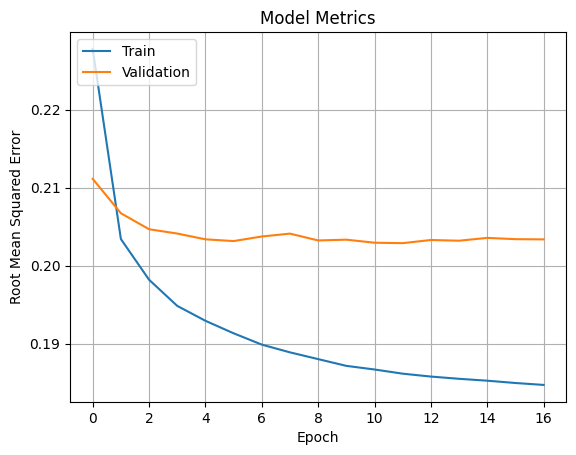

In [147]:
# menampilkan plot hasil evaluasi.
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

**Insight :**

Dari hasil evaluasi yang didapat dari model kedua yaitu **Collaborative-Filtering**. yang dapat diketahui bahwa nilai training RMSE menunjukkan model berhasil **mempelajari pola dari data pelatihan dengan baik** sedangkan nilai validation RMSE mengalami **indikasi awal overfitting** dimana model terus membaik didata pelatihan tetapi tidak lagi membaik didata validasi.

In [135]:
# Inisialisasi Data
movie_df = movie_new
df = pd.read_csv('ratings.csv')

# mengambil Salah Satu User Secara Acak
user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]

# mengambil Film yang Sudah Ditonton oleh User
movie_not_watched = movie_df[~movie_df['movie_id'].isin(movie_watched_by_user.movieId.values)]['movie_id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)
# menampilkan hasil Filter Film yang Belum Pernah Ditonton
movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [144]:
# memprediksi Rating untuk Film yang Belum Ditonton
ratings = model.predict(user_movie_array).flatten()

# mengambil 10 Film Teratas Berdasarkan Prediksi
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

# menampilkan rekomendasi film
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)

# Menampilkan Film dengan Rating Tertinggi dari User
top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

# Menampilkan 10 Rekomendasi Film untuk User
movie_df_rows = movie_df[movie_df['movie_id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genre)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['movie_id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genre)

252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for users: 30
movie with high ratings from user
--------------------------------
Crimson Tide (1995) : Drama|Thriller|War
Catch Me If You Can (2002) : Crime|Drama
Chicago (2002) : Comedy|Crime|Drama|Musical
King of Comedy, The (1983) : Comedy|Drama
Long, Hot Summer, The (1958) : Drama
--------------------------------
Top 10 movie recommendation
--------------------------------
Persuasion (1995) : Drama|Romance
All About Eve (1950) : Drama
Cinema Paradiso (Nuovo cinema Paradiso) (1989) : Drama
Paris Is Burning (1990) : Documentary
Ran (1985) : Drama|War
Raise the Red Lantern (Da hong deng long gao gao gua) (1991) : Drama
Gandhi (1982) : Drama
Killing Fields, The (1984) : Drama|War
Paris, Texas (1984) : Drama|Romance
Happiness (1998) : Comedy|Drama


**Insight**

Pada tahap ini, penulis melakukan untuk menampilkan jumlah film yang diberikan rating tinggi oleh pengguna. dari hasil diatas yang ditampilkan bahwa pengguna yang memberikan rating tertinggi dari film ialah :  

--------------------------------
- Film : Crimson Tide (1995) dengan genre *Drama|Thriller|War* <br>
- Film Catch Me If You Can (2002) dengan genre *Crime|Drama*<br>
- Film Chicago (2002) dengan genre Comedy|Crime|Drama|Musical*<br>
- Film King of Comedy, The (1983) dengan genre *Comedy|Drama*<br>
- Film Long, Hot Summer, The (1958) dengan genre *Drama*
--------------------------------

dari yang dapat disimpulkan bahwa genre terbanyak yang banyak diminati oleh user ialah : *``Drama, Crime, Comedy dan Musical``*.

In [148]:
# report evaluasi model ()
model.evaluate(x,y)

3126/3126 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.6156 - root_mean_squared_error: 0.2163


[0.6153561472892761, 0.2160370796918869]

In [159]:
# Import library yang dibutuhkan
from sklearn.metrics import mean_absolute_error
import numpy as np

# Melakukan prediksi
predicted_y = model.predict(x)

# Menghitung MSE
# Menghitung MAE
mae = mean_absolute_error(y, predicted_y)
print("MAE:", mae)

# Menghitung RMSE secara manual
rmse = np.sqrt(mae)

# Menampilkan hasil
print(f"Mean Squared Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

3126/3126 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
MAE: 0.16764182018017182
Mean Squared Error (MAE): 0.1676
Root Mean Squared Error (RMSE): 0.4094


In [160]:
mae

0.16764182018017182

In [161]:
rmse

np.float64(0.4094408628607699)

**Menampilkan nilai error**

Pada tahap ini, penulis menampilkan hasil nilai error dari **``RMSE dan MSE``**, yang dapat diketahui bahwa dari hasil diatas adalah nilai **RMSE** sebanyak 0,218 yang dimana menunjukkan selisih antara prediksi dan nilai aktual pada kesalahan prediksi yang rendah dan nilai **MSE** sebanyak 0,047 yang menunjukkan nilai MSE cukup rendah dan prediksi model cukup akurat yang berada dengan nilai aktual user.

<ipython-input-154-d83704f468fe>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


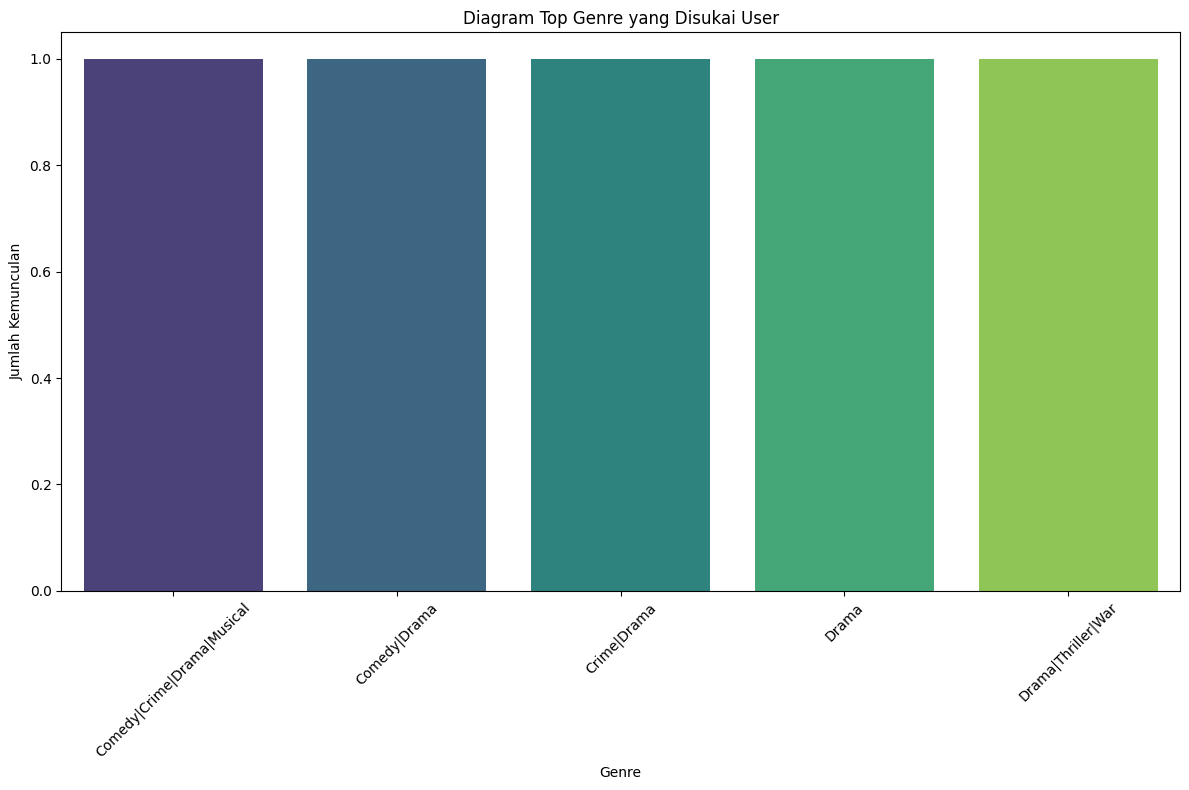

In [154]:
# Membuat list genre unik dari data
user_genres = []
list_movie_genres = movie_df_rows.genre.unique()

for genre in list_movie_genres:
    user_genres.extend(genre.split(', '))

# Ambil genre unik dan urutkan
user_genres = sorted(set(user_genres))

# Inisialisasi dictionary untuk menghitung jumlah genre
total_genre_by_user = {genre: 0 for genre in user_genres}

# Hitung total kemunculan tiap genre
for movie_genre in movie_df_rows['genre']:
    list_genres = movie_genre.split(', ')
    for genre in list_genres:
        total_genre_by_user[genre] += 1

# Urutkan berdasarkan jumlah kemunculan (descending)
total_genre_by_user = dict(sorted(total_genre_by_user.items(), key=lambda x: x[1], reverse=True))

# Plot bar chart untuk 10 genre teratas
plt.figure(figsize=(12, 8))
sns.barplot(
    x=list(total_genre_by_user.keys())[:10],
    y=list(total_genre_by_user.values())[:10],
    palette="viridis"
)
plt.xticks(rotation=45)
plt.title("Diagram Top Genre yang Disukai User")
plt.xlabel("Genre")
plt.ylabel("Jumlah Kemunculan")
plt.tight_layout()
plt.show()

**Hasil Visualisasi**

setelah penulis melakukan tampilan hasil prediksi genre yang disukai oleh user dari rating tertinggi, maka penulis melakukan hasil visualisasinya dengan menggunakan bar chart untuk melihat secara jelas genre yang **paling banyak diminati** oleh user.

<ipython-input-157-dfe04726c563>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


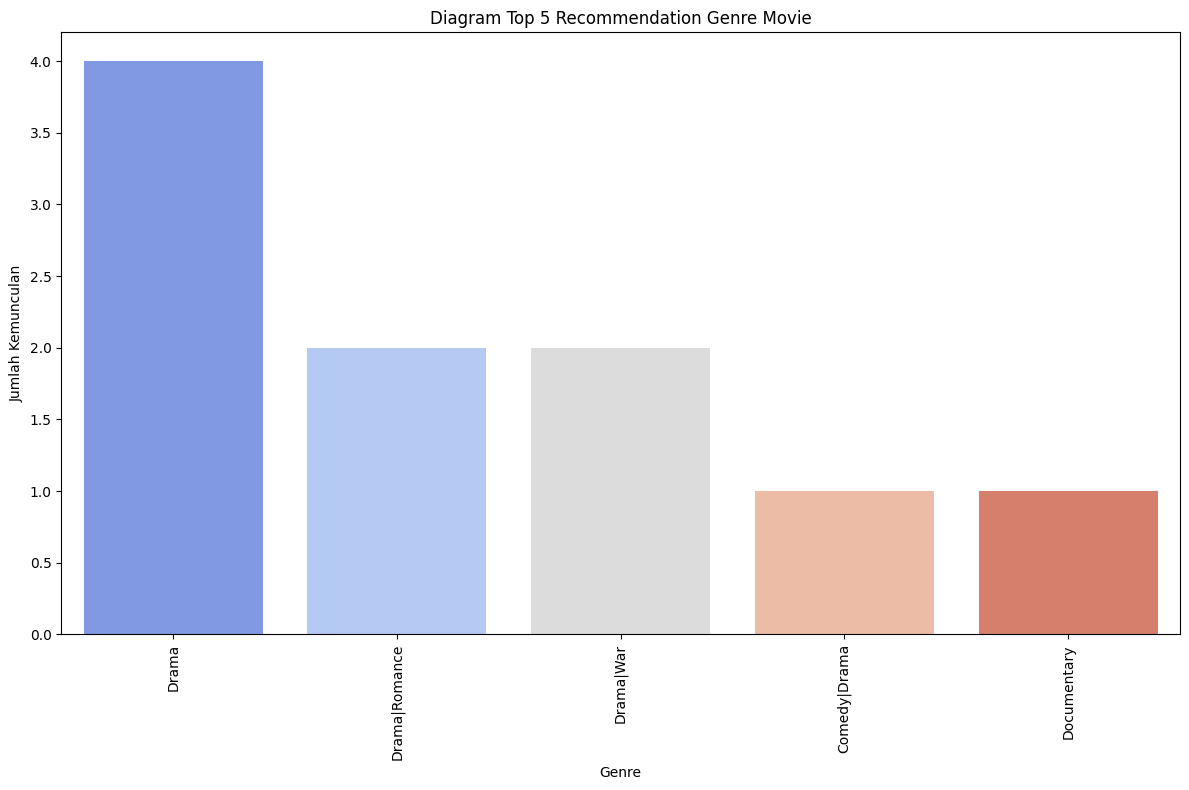

In [157]:
# Ekstraksi semua genre unik dari data rekomendasi
recommended_genres = []
list_movie_genres = recommended_movie.genre.unique()

for genre_string in list_movie_genres:
    recommended_genres.extend(genre_string.split(', '))

# Ambil hanya genre unik
recommended_genres = sorted(set(recommended_genres))

# Inisialisasi dictionary untuk menghitung jumlah genre
total_genre_by_recommendation = {genre: 0 for genre in recommended_genres}

# Hitung jumlah kemunculan tiap genre dari data rekomendasi
for movie_genre in recommended_movie['genre']:
    list_movie_genre = movie_genre.split(', ')
    for genre in list_movie_genre:
        total_genre_by_recommendation[genre] += 1

# Urutkan berdasarkan frekuensi (descending)
total_genre_by_recommendation = dict(sorted(
    total_genre_by_recommendation.items(),
    key=lambda x: x[1],
    reverse=True
))

# Plot top 10 genre
plt.figure(figsize=(12, 8))
sns.barplot(
    x=list(total_genre_by_recommendation.keys())[:10],
    y=list(total_genre_by_recommendation.values())[:10],
    palette="coolwarm"
)
plt.xticks(rotation=90)
plt.title("Diagram Top 5 Recommendation Genre Movie")
plt.xlabel("Genre")
plt.ylabel("Jumlah Kemunculan")
plt.tight_layout()
plt.show()

**Visualisasi Genre**

Pada tahap ini, penulis melakukan hasil visualisasi dari rating tertinggi berdasarkan genre yang diminati oleh user, dari yang dapat diketahui bahwa genre yang paling banyak disukai oleh user ialah **Drama, Comedy, Crime dan Documentary**.

### Kesimpulan
- **Content-Based Filtering** hampir sama dengan analisis sentimen dimana sebagai pendekatan awal namun performa dalam memberikan rekomendasi pada user terbatas karena hanya mengandalkan judul film berdasarkan fitur **genre**. hasil evaluasi model yang didapat dengan menggunakan *Precision@K5 dan Recall@K5* memberikan nilai yang akurat serta memberikan rekomendasi film yang relevan untuk pengguna. dari 2 contoh film input yang di evaluasi yaitu **``Toy Story (1995) dan Jumanji (1995)``** mendapatkan hasil sebagai berikut <br>

| Film               | Precision@5 | Recall@5 |
|--------------------|-------------|----------|
| Toy Story (1995)   | 16.60%      | 100.00%  |
| Jumanji (1995)     | 2.62%       | 100.00%  |

<br>

- **Collaborative Filtering** memberikan hasil evaluasi dengan hasil terbaik serta performa yang baik dalam menangkap pola laten preferensi pengguna, dengan menggunakan 2 metrik pada model yaitu **RMSE dan MAE** yang menujukkan nilai error yang rendah dan performa yang baik pada model.
